In [23]:
import sys, os
sys.path.insert(0, os.path.abspath('..'))

from scripts import project_functions
csv = "Electric_Vehicle_Population_Data.csv"
df = project_functions.load_and_process(csv)

,VIN,County,City,ZIP,Model_Year,Make,Model,EV_Type,Range,MSRP,Location,Latitude,Longitude,North_South,West_East
0,JA4J24A5XJ,King,KENT,98032,2018,MITSUBISHI,OUTLANDER,PHEV,22,34595,POINT (-122.26132099999998 47.390601),47.390601,-122.261321,North,East
1,JN1AZ0CP7B,King,COVINGTON,98042,2011,NISSAN,LEAF,BEV,73,32780,POINT (-122.11667400000002 47.363112),47.363112,-122.116674,North,East
2,1G1FW6S07H,Clark,CAMAS,98607,2017,CHEVROLET,BOLT,BEV,238,37495,POINT (-122.40849800000001 45.620943),45.620943,-122.408498,South,East
3,1N4AZ0CP6D,King,SEATTLE,98117,2013,NISSAN,LEAF,BEV,75,28800,POINT (-122.379354 47.687571),47.687571,-122.379354,North,East
4,JN1AZ0CP1B,Clark,CAMAS,98607,2011,NISSAN,LEAF,BEV,73,32780,POINT (-122.40849800000001 45.620943),45.620943,-122.408498,South,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60920,5YJ3E1EC7L,King,SEATTLE,98119,2020,TESLA,MODEL 3,BEV,308,0,POINT (-122.36772100000002 47.639264),47.639264,-122.367721,North,East
60921,KNAGU4LE4K,Pierce,BONNEY LAKE,98391,2019,KIA,OPTIMA PLUG-IN HYBRID,PHEV,29,35390,POINT (-122.170798 47.184615),47.184615,-122.170798,South,East
60922,1G1RA6E42C,San Juan,EASTSOUND,98245,2012,CHEVROLET,VOLT,PHEV,35,39145,POINT (-122.924946 48.657249),48.657249,-122.924946,North,East
60923,WBY8P6C05L,King,SEATTLE,98122,2020,BMW,I3,BEV,153,0,POINT (-122.303413 47.61065),47.610650,-122.303413,North,East


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df.shape
df.head()
df.columns

Index(['VIN', 'County', 'City', 'ZIP', 'Model_Year', 'Make', 'Model',
       'EV_Type', 'Range', 'MSRP', 'Location', 'Latitude', 'Longitude',
       'North_South', 'West_East'],
      dtype='object')

In [28]:
df.nunique(axis=0)

VIN            4070
County           67
City            435
ZIP             541
Model_Year       19
Make             30
Model           101
EV_Type           2
Range            91
MSRP            148
Location        540
Latitude        540
Longitude       539
North_South       2
West_East         1
dtype: int64

<AxesSubplot:>

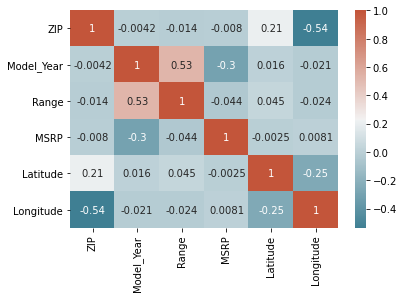

In [32]:
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

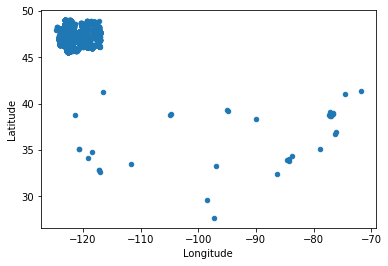

In [36]:
df.plot(kind='scatter', x='Longitude', y='Latitude')

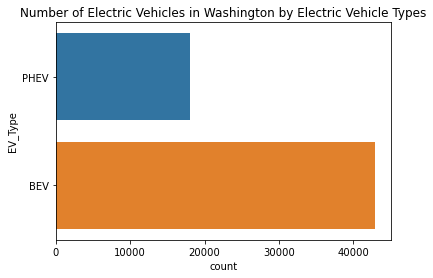

In [39]:
ax = sns.countplot(y = df["EV_Type"], data = df).set_title("Number of Electric Vehicles in Washington by Electric Vehicle Types")

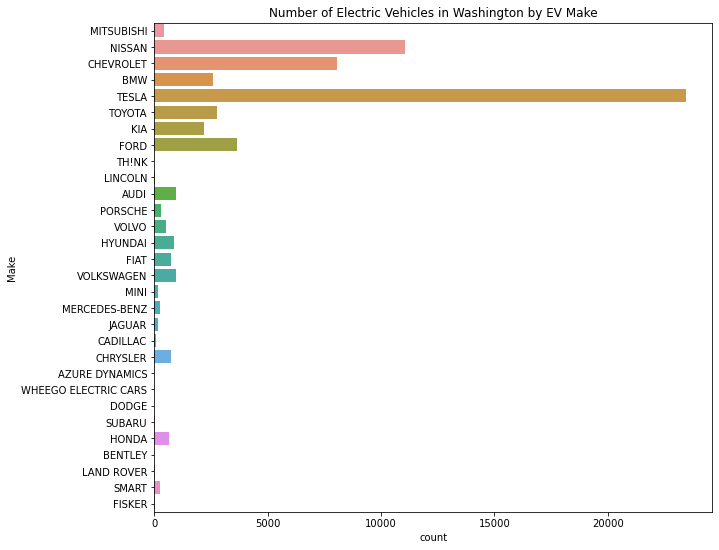

In [42]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 9)
ax1 = sns.countplot(y = df["Make"], data = df).set_title("Number of Electric Vehicles in Washington by EV Make")

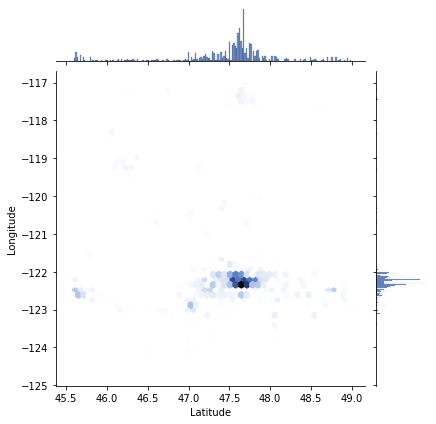

In [49]:
df1 = df[(df['Latitude'] > 45) & (df['Longitude'] < -115)]
sns.jointplot(x="Latitude", y="Longitude", kind="hex", data=df1, color="#4571c5")

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

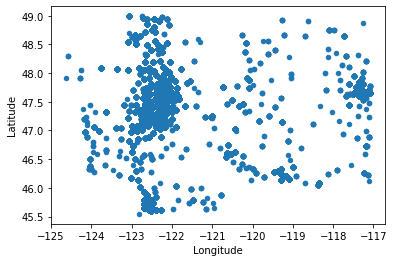

In [50]:
df1.plot(kind='scatter', x='Longitude', y='Latitude')

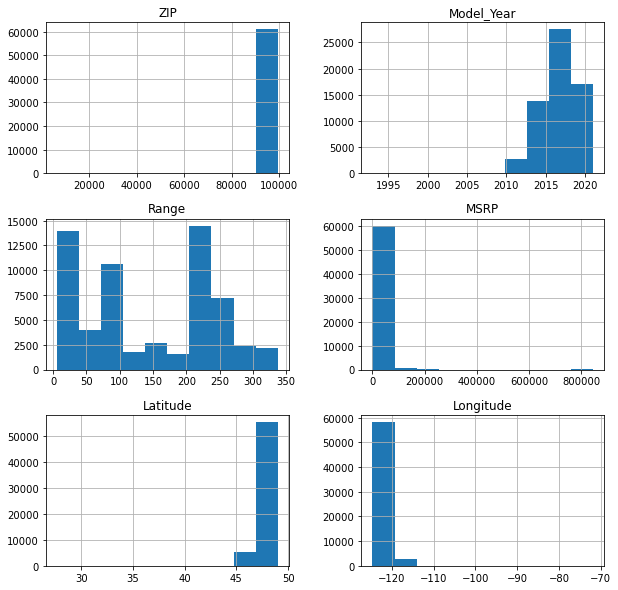

In [51]:
hist = df.hist(bins=10,figsize =(10,10))

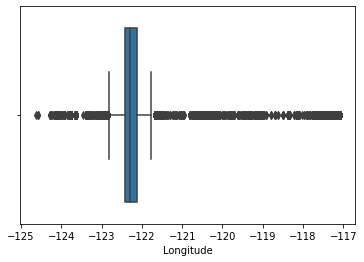

In [59]:
boxplot = sns.boxplot(x = df1['Longitude'])

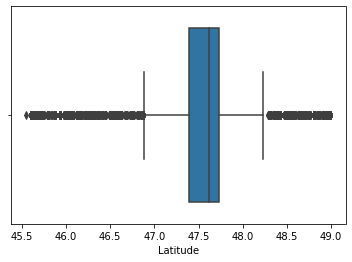

In [60]:
boxplot1 = sns.boxplot(x = df1['Latitude'])